In [66]:
import phasma
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import sys
import csv
import pandas as pd

def avged(t, flux, period, show=False):
    avgedfluxes = []
    avgedts = []
    nbins = 500
    tstep = period / nbins
    modt = t % period
    for currstart in np.arange(0, period, period/nbins):
        currend = currstart + period/nbins
        indices =  np.where((modt>=currstart) & (modt<currend))
        if len(indices) > 0:
            avgedfluxes.append(np.median(flux[indices]))
            avgedts.append(np.median(modt[indices]))
    if show:
        plt.clf()
        plt.scatter(t % period, flux, alpha=0.4, s=0.1, c="grey")
        plt.scatter(avgedts, avgedfluxes, alpha=1, s=10, c="black")
        plt.show()
    return t, flux, period, avgedts, avgedfluxes

def phasecurve(data, savepath=False, show=True):
    t = data[0]
    f = data[1]
    period = data[2]
    avgedts = data[3]
    avgedfluxes = data[4]
    
    offset = avgedts[np.argmin(avgedfluxes)//2]
    modt = t - offset - period * np.floor((t-offset)/period)
    modt = modt * (1 / (np.max(modt)-np.min(modt)))
    modt = modt - modt[np.argmin(f)]
    f = np.concatenate((f[np.where(modt >= 0.5)], f[np.where(modt < 0.5)]))
    modt = np.concatenate((modt[np.where(modt >= 0.5)]-1, modt[np.where(modt < 0.5)]))
    
    avgedfluxes = []
    avgedts = []
    nbins = 500
    tstep = period/nbins
    for currstart in np.arange(-0.5, 0.5, 1.0/nbins):
        currend = currstart + 1.0/nbins
        indices = np.where((modt>=currstart) & (modt<currend))
        if len(indices) > 0:
            avgedfluxes.append(np.median(f[indices]))
            avgedts.append(np.median(modt[indices]))
    
    if savepath or show:
        plt.clf()
        plt.xlim(-0.5, 0.5)
        plt.xticks(np.arange(-0.5, 0.51, 0.1))
        plt.scatter(modt, f, alpha=0.8, s=0.3, color="grey")
        plt.scatter(avgedts, avgedfluxes, alpha=1, s=10, c="black")
        if savepath:
            plt.savefig(savepath)
        else:
            plt.show()

fitsfiles/tess2019112060037-s0011-0000000000091961-0143-s_lc.fits


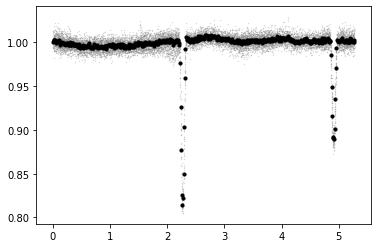

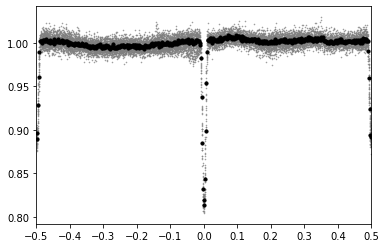

In [67]:
row = df.iloc[1]
tid = int(row['tid'])
period = row['period'] / row['harmonic']
object_ = phasma.Tess(tid, float(period) * u.day, 
                     float(row['duration'])*u.hour, float(row['tau0']), [row['sector']], save=False)
t = object_._raw_time
flux = object_._raw_flux

savepath = f'rawflux/{tid}.png'
phasecurve(avged(t, flux, period, show=True), show=True)

In [ ]:
df = pd.read_csv("harmonics_corrected.csv")
for i, row in df.iterrows():
    tid = int(row['tid'])
    period = row['period'] / row['harmonic']
    print(f'Examining TIC ID {tid} ({i+1}/{df.shape[0]})')
    object_ = phasma.Tess(tid, float(period) * u.day, 
                          float(row['duration'])*u.hour, float(row['tau0']), [row['sector']], save=False)
    t = object_._raw_time
    flux = object_._raw_flux

    savepath = f'rawflux/{tid}.png'
    phasecurve(avged(t, flux, period), savepath=savepath)
    plt.savefig(savepath)

Examining TIC ID 52357 (1/1364)
fitsfiles/tess2019112060037-s0011-0000000000052357-0143-s_lc.fits
Examining TIC ID 91961 (2/1364)
fitsfiles/tess2019112060037-s0011-0000000000091961-0143-s_lc.fits
Examining TIC ID 120016 (3/1364)
fitsfiles/tess2019112060037-s0011-0000000000120016-0143-s_lc.fits
Examining TIC ID 627436 (4/1364)
fitsfiles/tess2018319095959-s0005-0000000000627436-0125-s_lc.fits
Examining TIC ID 1029392 (5/1364)
fitsfiles/tess2018292075959-s0004-0000000001029392-0124-s_lc.fits
Examining TIC ID 1045298 (6/1364)
fitsfiles/tess2018292075959-s0004-0000000001045298-0124-s_lc.fits
Examining TIC ID 1129237 (7/1364)
fitsfiles/tess2018292075959-s0004-0000000001129237-0124-s_lc.fits
Examining TIC ID 1129452 (8/1364)
fitsfiles/tess2018292075959-s0004-0000000001129452-0124-s_lc.fits
Examining TIC ID 1190662 (9/1364)
fitsfiles/tess2019032160000-s0008-0000000001190662-0136-s_lc.fits
Examining TIC ID 1230647 (10/1364)
fitsfiles/tess2019032160000-s0008-0000000001230647-0136-s_lc.fits
Exami

Examining TIC ID 25078924 (82/1364)
fitsfiles/tess2019169103026-s0013-0000000025078924-0146-s_lc.fits
Examining TIC ID 25188036 (83/1364)
fitsfiles/tess2018349182459-s0006-0000000025188036-0126-s_lc.fits
Examining TIC ID 27654882 (84/1364)
fitsfiles/tess2019006130736-s0007-0000000027654882-0131-s_lc.fits
Examining TIC ID 29052041 (85/1364)
fitsfiles/tess2019032160000-s0008-0000000029052041-0136-s_lc.fits
Examining TIC ID 29778064 (86/1364)
fitsfiles/tess2019169103026-s0013-0000000029778064-0146-s_lc.fits
Examining TIC ID 29780293 (87/1364)
fitsfiles/tess2019169103026-s0013-0000000029780293-0146-s_lc.fits
Examining TIC ID 29847695 (88/1364)
fitsfiles/tess2018263035959-s0003-0000000029847695-0123-s_lc.fits
Examining TIC ID 29848012 (89/1364)
fitsfiles/tess2018263035959-s0003-0000000029848012-0123-s_lc.fits
Examining TIC ID 30028394 (90/1364)
fitsfiles/tess2018292075959-s0004-0000000030028394-0124-s_lc.fits
Examining TIC ID 30034081 (91/1364)
fitsfiles/tess2019140104343-s0012-000000003003

Examining TIC ID 43712632 (162/1364)
fitsfiles/tess2018319095959-s0005-0000000043712632-0125-s_lc.fits
Examining TIC ID 43846099 (163/1364)
fitsfiles/tess2018319095959-s0005-0000000043846099-0125-s_lc.fits
Examining TIC ID 43864479 (164/1364)
fitsfiles/tess2018319095959-s0005-0000000043864479-0125-s_lc.fits
Examining TIC ID 44623916 (165/1364)
fitsfiles/tess2018206045859-s0001-0000000044623916-0120-s_lc.fits
Examining TIC ID 44790502 (166/1364)
fitsfiles/tess2018319095959-s0005-0000000044790502-0125-s_lc.fits
Examining TIC ID 46313508 (167/1364)
fitsfiles/tess2018349182459-s0006-0000000046313508-0126-s_lc.fits
Examining TIC ID 47175622 (168/1364)
fitsfiles/tess2019032160000-s0008-0000000047175622-0136-s_lc.fits
Examining TIC ID 47309500 (169/1364)
fitsfiles/tess2019140104343-s0012-0000000047309500-0144-s_lc.fits
Examining TIC ID 47352608 (170/1364)
fitsfiles/tess2019058134432-s0009-0000000047352608-0139-s_lc.fits
Examining TIC ID 47763235 (171/1364)
fitsfiles/tess2018349182459-s0006-00

Examining TIC ID 67808952 (242/1364)
fitsfiles/tess2018319095959-s0005-0000000067808952-0125-s_lc.fits
Examining TIC ID 68416596 (243/1364)
fitsfiles/tess2019140104343-s0012-0000000068416596-0144-s_lc.fits
Examining TIC ID 69838619 (244/1364)
fitsfiles/tess2018234235059-s0002-0000000069838619-0121-s_lc.fits
Examining TIC ID 69889494 (245/1364)
fitsfiles/tess2018234235059-s0002-0000000069889494-0121-s_lc.fits
Examining TIC ID 70717462 (246/1364)
fitsfiles/tess2019058134432-s0009-0000000070717462-0139-s_lc.fits
Examining TIC ID 70761941 (247/1364)
fitsfiles/tess2018234235059-s0002-0000000070761941-0121-s_lc.fits
Examining TIC ID 71026173 (248/1364)
fitsfiles/tess2018319095959-s0005-0000000071026173-0125-s_lc.fits
Examining TIC ID 71107089 (249/1364)
fitsfiles/tess2018319095959-s0005-0000000071107089-0125-s_lc.fits
Examining TIC ID 71298511 (250/1364)
fitsfiles/tess2019058134432-s0009-0000000071298511-0139-s_lc.fits
Examining TIC ID 71546916 (251/1364)
fitsfiles/tess2019058134432-s0009-00

Examining TIC ID 98064760 (322/1364)
fitsfiles/tess2019169103026-s0013-0000000098064760-0146-s_lc.fits
Examining TIC ID 98658304 (323/1364)
fitsfiles/tess2018263035959-s0003-0000000098658304-0123-s_lc.fits
Examining TIC ID 98777963 (324/1364)
fitsfiles/tess2018292075959-s0004-0000000098777963-0124-s_lc.fits
Examining TIC ID 98827212 (325/1364)
fitsfiles/tess2018292075959-s0004-0000000098827212-0124-s_lc.fits
Examining TIC ID 98828631 (326/1364)
fitsfiles/tess2018292075959-s0004-0000000098828631-0124-s_lc.fits
Examining TIC ID 98853987 (327/1364)
fitsfiles/tess2018292075959-s0004-0000000098853987-0124-s_lc.fits
Examining TIC ID 99465976 (328/1364)
fitsfiles/tess2018206045859-s0001-0000000099465976-0120-s_lc.fits
Examining TIC ID 99646802 (329/1364)
fitsfiles/tess2018206045859-s0001-0000000099646802-0120-s_lc.fits
Examining TIC ID 100029948 (330/1364)
fitsfiles/tess2018234235059-s0002-0000000100029948-0121-s_lc.fits
Examining TIC ID 100917608 (331/1364)
fitsfiles/tess2018263035959-s0003-

Examining TIC ID 129888462 (401/1364)
fitsfiles/tess2018292075959-s0004-0000000129888462-0124-s_lc.fits
Examining TIC ID 130942594 (402/1364)
fitsfiles/tess2019085135100-s0010-0000000130942594-0140-s_lc.fits
Examining TIC ID 133105082 (403/1364)
fitsfiles/tess2019006130736-s0007-0000000133105082-0131-s_lc.fits
Examining TIC ID 133701671 (404/1364)
fitsfiles/tess2019140104343-s0012-0000000133701671-0144-s_lc.fits
Examining TIC ID 134283998 (405/1364)
fitsfiles/tess2019006130736-s0007-0000000134283998-0131-s_lc.fits
Examining TIC ID 135244338 (406/1364)
fitsfiles/tess2019085135100-s0010-0000000135244338-0140-s_lc.fits
Examining TIC ID 137860956 (407/1364)
fitsfiles/tess2018292075959-s0004-0000000137860956-0124-s_lc.fits
Examining TIC ID 139128537 (408/1364)
fitsfiles/tess2018206045859-s0001-0000000139128537-0120-s_lc.fits
Examining TIC ID 139148071 (409/1364)
fitsfiles/tess2018206045859-s0001-0000000139148071-0120-s_lc.fits
Examining TIC ID 139188326 (410/1364)
fitsfiles/tess201820604585

Examining TIC ID 148544875 (480/1364)
fitsfiles/tess2019058134432-s0009-0000000148544875-0139-s_lc.fits
Examining TIC ID 148611095 (481/1364)
fitsfiles/tess2019058134432-s0009-0000000148611095-0139-s_lc.fits
Examining TIC ID 148612685 (482/1364)
fitsfiles/tess2019058134432-s0009-0000000148612685-0139-s_lc.fits
Examining TIC ID 149248196 (483/1364)
fitsfiles/tess2018292075959-s0004-0000000149248196-0124-s_lc.fits
Examining TIC ID 149319411 (484/1364)
fitsfiles/tess2019006130736-s0007-0000000149319411-0131-s_lc.fits
Examining TIC ID 149473467 (485/1364)
fitsfiles/tess2019169103026-s0013-0000000149473467-0146-s_lc.fits
Examining TIC ID 149573659 (486/1364)
fitsfiles/tess2018319095959-s0005-0000000149573659-0125-s_lc.fits
Examining TIC ID 149629043 (487/1364)
fitsfiles/tess2019058134432-s0009-0000000149629043-0139-s_lc.fits
Examining TIC ID 149837469 (488/1364)
fitsfiles/tess2018234235059-s0002-0000000149837469-0121-s_lc.fits
Examining TIC ID 149861542 (489/1364)
fitsfiles/tess201831909595

Examining TIC ID 168674931 (559/1364)
fitsfiles/tess2018292075959-s0004-0000000168674931-0124-s_lc.fits
Examining TIC ID 168675489 (560/1364)
fitsfiles/tess2018319095959-s0005-0000000168675489-0125-s_lc.fits
Examining TIC ID 168697816 (561/1364)
fitsfiles/tess2018319095959-s0005-0000000168697816-0125-s_lc.fits
Examining TIC ID 168851294 (562/1364)
fitsfiles/tess2018319095959-s0005-0000000168851294-0125-s_lc.fits
Examining TIC ID 169168102 (563/1364)
fitsfiles/tess2019006130736-s0007-0000000169168102-0131-s_lc.fits
Examining TIC ID 169316288 (564/1364)
fitsfiles/tess2019169103026-s0013-0000000169316288-0146-s_lc.fits
Examining TIC ID 169468632 (565/1364)
fitsfiles/tess2019112060037-s0011-0000000169468632-0143-s_lc.fits
Examining TIC ID 169532543 (566/1364)
fitsfiles/tess2018319095959-s0005-0000000169532543-0125-s_lc.fits
Examining TIC ID 169573910 (567/1364)
fitsfiles/tess2019169103026-s0013-0000000169573910-0146-s_lc.fits
Examining TIC ID 170676440 (568/1364)
fitsfiles/tess201831909595

Examining TIC ID 201497357 (638/1364)
fitsfiles/tess2018349182459-s0006-0000000201497357-0126-s_lc.fits
Examining TIC ID 201747686 (639/1364)
fitsfiles/tess2019169103026-s0013-0000000201747686-0146-s_lc.fits
Examining TIC ID 201776479 (640/1364)
fitsfiles/tess2018234235059-s0002-0000000201776479-0121-s_lc.fits
Examining TIC ID 204325855 (641/1364)
fitsfiles/tess2018234235059-s0002-0000000204325855-0121-s_lc.fits
Examining TIC ID 204327008 (642/1364)
fitsfiles/tess2018234235059-s0002-0000000204327008-0121-s_lc.fits
Examining TIC ID 204497617 (643/1364)
fitsfiles/tess2018206045859-s0001-0000000204497617-0120-s_lc.fits
Examining TIC ID 206385554 (644/1364)
fitsfiles/tess2018263035959-s0003-0000000206385554-0123-s_lc.fits
Examining TIC ID 206462116 (645/1364)
fitsfiles/tess2018206045859-s0001-0000000206462116-0120-s_lc.fits
Examining TIC ID 206468815 (646/1364)
fitsfiles/tess2018292075959-s0004-0000000206468815-0124-s_lc.fits
Examining TIC ID 206537272 (647/1364)
fitsfiles/tess201820604585

Examining TIC ID 231809798 (717/1364)
fitsfiles/tess2018319095959-s0005-0000000231809798-0125-s_lc.fits
Examining TIC ID 231810776 (718/1364)
fitsfiles/tess2019006130736-s0007-0000000231810776-0131-s_lc.fits
Examining TIC ID 231822771 (719/1364)
fitsfiles/tess2018319095959-s0005-0000000231822771-0125-s_lc.fits
Examining TIC ID 231828370 (720/1364)
fitsfiles/tess2018234235059-s0002-0000000231828370-0121-s_lc.fits
Examining TIC ID 231833061 (721/1364)
fitsfiles/tess2018206045859-s0001-0000000231833061-0120-s_lc.fits
Examining TIC ID 231840927 (722/1364)
fitsfiles/tess2018234235059-s0002-0000000231840927-0121-s_lc.fits
Examining TIC ID 231851620 (723/1364)
fitsfiles/tess2018234235059-s0002-0000000231851620-0121-s_lc.fits
Examining TIC ID 231921891 (724/1364)
fitsfiles/tess2018319095959-s0005-0000000231921891-0125-s_lc.fits
Examining TIC ID 231922417 (725/1364)
fitsfiles/tess2018319095959-s0005-0000000231922417-0125-s_lc.fits
Examining TIC ID 231922739 (726/1364)
fitsfiles/tess201831909595

Examining TIC ID 258314976 (796/1364)
fitsfiles/tess2019085135100-s0010-0000000258314976-0140-s_lc.fits
Examining TIC ID 258837989 (797/1364)
fitsfiles/tess2019112060037-s0011-0000000258837989-0143-s_lc.fits
Examining TIC ID 259543079 (798/1364)
fitsfiles/tess2018263035959-s0003-0000000259543079-0123-s_lc.fits
Examining TIC ID 259589049 (799/1364)
fitsfiles/tess2018292075959-s0004-0000000259589049-0124-s_lc.fits
Examining TIC ID 259590223 (800/1364)
fitsfiles/tess2018292075959-s0004-0000000259590223-0124-s_lc.fits
Examining TIC ID 259701720 (801/1364)
fitsfiles/tess2018349182459-s0006-0000000259701720-0126-s_lc.fits
Examining TIC ID 259864042 (802/1364)
fitsfiles/tess2018206045859-s0001-0000000259864042-0120-s_lc.fits
Examining TIC ID 259901124 (803/1364)
fitsfiles/tess2019169103026-s0013-0000000259901124-0146-s_lc.fits
Examining TIC ID 260124760 (804/1364)
fitsfiles/tess2019032160000-s0008-0000000260124760-0136-s_lc.fits
Examining TIC ID 260131665 (805/1364)
fitsfiles/tess201829207595

Examining TIC ID 274039311 (875/1364)
fitsfiles/tess2018292075959-s0004-0000000274039311-0124-s_lc.fits
Examining TIC ID 274039489 (876/1364)
fitsfiles/tess2018292075959-s0004-0000000274039489-0124-s_lc.fits
Examining TIC ID 274088422 (877/1364)
fitsfiles/tess2018292075959-s0004-0000000274088422-0124-s_lc.fits
Examining TIC ID 274229418 (878/1364)
fitsfiles/tess2019006130736-s0007-0000000274229418-0131-s_lc.fits
Examining TIC ID 275254541 (879/1364)
fitsfiles/tess2019032160000-s0008-0000000275254541-0136-s_lc.fits
Examining TIC ID 277373390 (880/1364)
fitsfiles/tess2019169103026-s0013-0000000277373390-0146-s_lc.fits
Examining TIC ID 277912443 (881/1364)
fitsfiles/tess2019169103026-s0013-0000000277912443-0146-s_lc.fits
Examining TIC ID 278270436 (882/1364)
fitsfiles/tess2019006130736-s0007-0000000278270436-0131-s_lc.fits
Examining TIC ID 278683641 (883/1364)
fitsfiles/tess2018234235059-s0002-0000000278683641-0121-s_lc.fits
Examining TIC ID 278706358 (884/1364)
fitsfiles/tess201820604585

Examining TIC ID 300443831 (954/1364)
fitsfiles/tess2018349182459-s0006-0000000300443831-0126-s_lc.fits
Examining TIC ID 300560295 (955/1364)
fitsfiles/tess2018319095959-s0005-0000000300560295-0125-s_lc.fits
Examining TIC ID 300654002 (956/1364)
fitsfiles/tess2018319095959-s0005-0000000300654002-0125-s_lc.fits
Examining TIC ID 300892362 (957/1364)
fitsfiles/tess2019085135100-s0010-0000000300892362-0140-s_lc.fits
Examining TIC ID 300972613 (958/1364)
fitsfiles/tess2018234235059-s0002-0000000300972613-0121-s_lc.fits
Examining TIC ID 301022235 (959/1364)
fitsfiles/tess2018263035959-s0003-0000000301022235-0123-s_lc.fits
Examining TIC ID 301247295 (960/1364)
fitsfiles/tess2019140104343-s0012-0000000301247295-0144-s_lc.fits
Examining TIC ID 301405723 (961/1364)
fitsfiles/tess2018292075959-s0004-0000000301405723-0124-s_lc.fits
Examining TIC ID 301407485 (962/1364)
fitsfiles/tess2018292075959-s0004-0000000301407485-0124-s_lc.fits
Examining TIC ID 301956407 (963/1364)
fitsfiles/tess201914010434